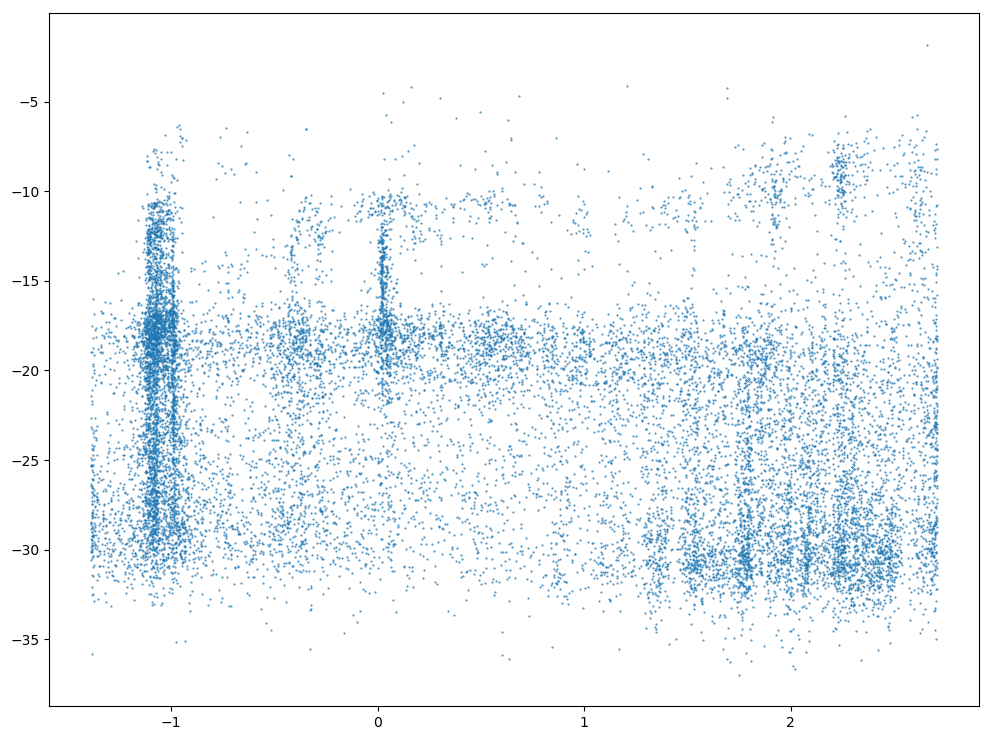

PyObject <matplotlib.collections.PathCollection object at 0x000000002CFD1B00>

In [21]:
using CSV
using PyPlot

data = CSV.read("master.csv")
figure(figsize=(12,9))
scatter(log.(data[:Guessed_Period]), log.(data[:Peak_Zeta]), alpha=0.8, s=0.3)

In [36]:
temp = CSV.read("../knownEBs.csv")[1]
ebs = String[]
for i in 1:size(temp, 1)
    push!(ebs, string(temp[i])[1:7])
end
temp = CSV.read("../../exofop_tess_tois.csv")
tois = String[]
for i in 1:size(temp, 1)
    try
        if (contains(temp[i, :Sectors], "1"))
            push!(tois, temp[i, 1][1:7])
        end
    catch
        println("err")
    end
end

err
err


In [62]:
using DataFrames
cutdata = DataFrame(TID=Int64[], Peak_Zeta=Float64[], Guessed_Period=Float64[])
for i in 1:size(data, 1)
    if (!(string(data[i, :TID])[1:7] in ebs) && !(string(data[i, :TID])[1:7] in tois))
        push!(cutdata, [data[i, 1] data[i, 2] data[i, 3]])
    else
        println(data[i, 1])
    end
end
size(cutdata)

229808112
391904672
281562496
266584816
52204644
278866208
260043728
350445760
410354944
33862176
389525280
336732608
370138784
410214976
280832960
348717440
410354976
231908992
327709888
201291280
197766144
200655760
403153632
300871584
229057824
265612464
147201136
410214976
117544912
355653472
259962048
260609216
441125184
126658352
277772704
38763952
29781292
410155136
281781376
149302752
201291280
33715936
150428128
55650592
139699248
25375552
139699264
309402112
369251648
197783744
266996784
139841216
355706688
355706688
410187904
115105136
273826496
273792224
237915520
260609200
325094144
412066752
270251488
369218848
139128544
126637768
38509908
235000064
267263200
214198384
317019232
281598592
389476160
206609632
260304272
53842684
229808144
441196960
260795904
144458848
253931584
389726432
206537280
266980320
219308288
259901120
266980320
219308288
259901120
261656368
167342432
25064732
91369560
263003168
201256768
389658048
265591872
31740372
201256768
389658048
265591872
31

(16980, 3)

In [64]:
data = deepcopy(cutdata)

,TID,Peak_Zeta,Guessed_Period
1,234512384,6.52e-7,0.331721
2,234342096,1.64e-11,0.330067
3,394086688,8.25e-6,6.78834
4,147286016,6.16e-12,1.8301
5,348762368,3.4e-9,0.369245
6,50345700,2.27e-9,6.10356
7,121421384,8.69e-13,0.333662
8,92709864,1.77e-15,5.05666
9,389865536,1.68e-13,0.629207
10,38633244,8.54e-13,5.21848


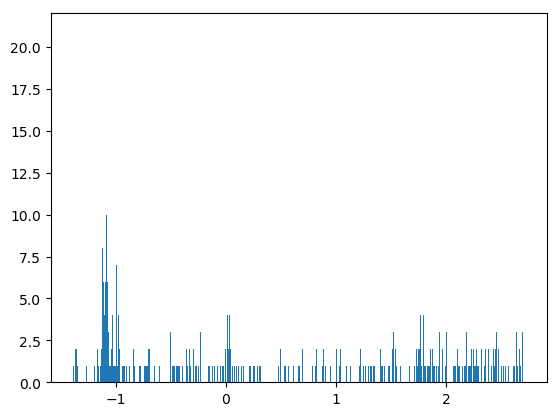

([14.0, 9.0, 4.0, 0.0, 0.0, 1.0, 4.0, 1.0, 0.0, 2.0  …  0.0, 4.0, 5.0, 3.0, 3.0, 4.0, 2.0, 2.0, 5.0, 21.0], [-1.38629, -1.38613, -1.38596, -1.38579, -1.38563, -1.38546, -1.38529, -1.38513, -1.38496, -1.38479  …  2.70654, 2.70671, 2.70687, 2.70704, 2.70721, 2.70737, 2.70754, 2.70771, 2.70787, 2.70804], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000005CBDC0B8>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CBDC0F0>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CBE6828>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CBE63C8>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CBF2208>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CC267B8>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CC31908>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CC31BA8>, PyObject <matplotlib.patches.Rectangle object at 0x000000005CC3D6D8>, PyObject <matplotlib.patches.Rectangle object at 0x

In [66]:
h = PyPlot.plt[:hist](log.(data[:Guessed_Period]),24567)

In [67]:
using DataFrames
periods = DataFrame(period=Float64[], count=Int32[])
for i in data[:Guessed_Period]
    if typeof(i) != Missings.Missing
        if i in periods[:period]
            periods[periods[:period].==i, :count] += 1
        else
            push!(periods, [i, 1])
        end
    end
end
sort!(periods, [:count], rev=true)
print(periods)

10478×2 DataFrames.DataFrame
│ Row   │ period   │ count │
├───────┼──────────┼───────┤
│ 1     │ 14.9998  │ 17    │
│ 2     │ 0.331334 │ 12    │
│ 3     │ 0.33724  │ 12    │
│ 4     │ 0.341368 │ 11    │
│ 5     │ 0.331445 │ 11    │
│ 6     │ 0.25     │ 11    │
│ 7     │ 0.370108 │ 11    │
│ 8     │ 0.370911 │ 11    │
⋮
│ 10470 │ 1.70297  │ 1     │
│ 10471 │ 0.818899 │ 1     │
│ 10472 │ 10.3109  │ 1     │
│ 10473 │ 5.91134  │ 1     │
│ 10474 │ 7.41278  │ 1     │
│ 10475 │ 3.82365  │ 1     │
│ 10476 │ 2.54689  │ 1     │
│ 10477 │ 5.37561  │ 1     │
│ 10478 │ 2.74388  │ 1     │

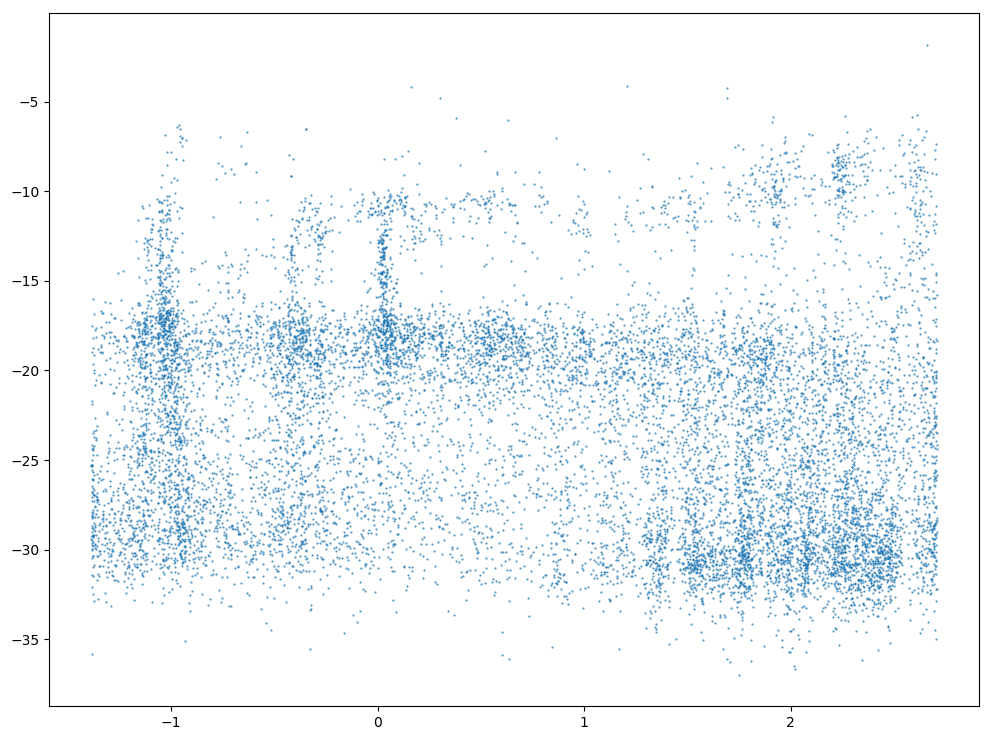

Cut 19.811542991755005% of data


PyObject <matplotlib.collections.PathCollection object at 0x00000000783BBBA8>

In [68]:
cutdata = deepcopy(data)
for i in 1:size(periods, 1)
    if periods[i, :count] > 3
        cutdata = cutdata[cutdata[:Guessed_Period] .!= periods[i, :period], :]
    end
end

println("Cut " * string((1-size(cutdata)[1]/size(data)[1])*100) * "% of data")
figure(figsize=(12,9))
scatter(log.(cutdata[:Guessed_Period]), log.(cutdata[:Peak_Zeta]), alpha=0.8, s=0.3)

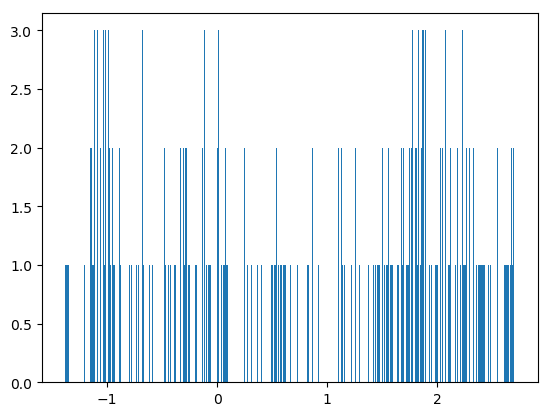

([3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 3.0  …  3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 2.0, 2.0], [-1.38613, -1.38596, -1.38579, -1.38563, -1.38546, -1.38529, -1.38513, -1.38496, -1.38479, -1.38463  …  2.70604, 2.70621, 2.70637, 2.70654, 2.70671, 2.70687, 2.70704, 2.70721, 2.70737, 2.70754], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000007AD744E0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD742E8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD74AC8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD74E10>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD42DD8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD42940>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD425C0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD42E10>, PyObject <matplotlib.patches.Rectangle object at 0x000000007AD42710>, PyObject <matplotlib.patches.Rectangle object at 0x00

In [69]:
h = PyPlot.plt[:hist](log.(cutdata[:Guessed_Period]),24567)

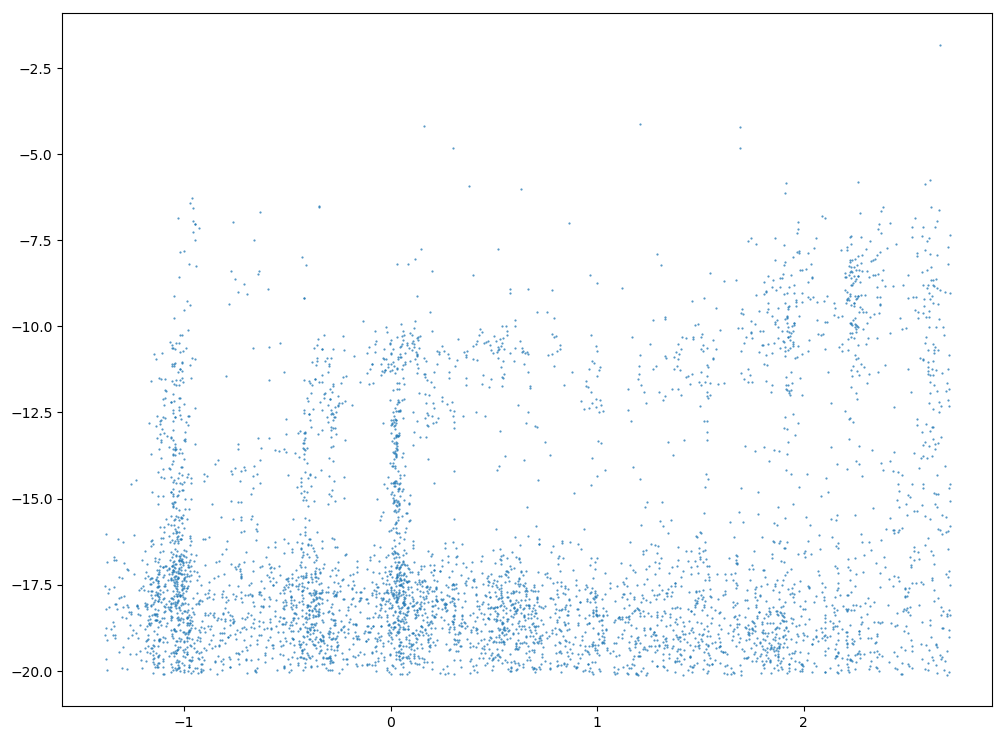

PyObject <matplotlib.collections.PathCollection object at 0x000000009258B208>

In [70]:
sort!(cutdata, [:Peak_Zeta], rev=true)
notable = cutdata[1:5000, :]
figure(figsize=(12,9))
scatter(log.(notable[:Guessed_Period]), log.(notable[:Peak_Zeta]), alpha=0.8, s=0.3)

In [83]:
notableShort = String[]
for i in 1:size(notable, 1)
    push!(notableShort, string(notable[i, 1])[1:7])
end

for i in readdir("phasecurves")
    if (i[1:7] in notableShort)
        try
            cp("./phasecurves/"*i, "./top5k/"*i)
        catch
            println("failed on " * i)
        end
    end
end

failed on 114917400.png
failed on 114952856.png
failed on 115041488.png
failed on 115113544.png
failed on 115190256.png
failed on 117518208.png
failed on 126604976.png
failed on 126605720.png
failed on 126639048.png
failed on 126641296.png
failed on 126702952.png
failed on 126708240.png
failed on 129649472.png
failed on 139131968.png
failed on 139191168.png
failed on 139199360.png
failed on 139282432.png
failed on 139453344.png
failed on 139456272.png
failed on 139679488.png
failed on 139825840.png
failed on 139987152.png
failed on 140578304.png
failed on 140609648.png
failed on 140755216.png
failed on 141124144.png
failed on 141153472.png
failed on 141210448.png
failed on 142082832.png
failed on 143821840.png
failed on 143822656.png
failed on 143851312.png
failed on 143854160.png
failed on 143952336.png
failed on 144046368.png
failed on 144065184.png
failed on 144202240.png
failed on 144252096.png
failed on 147302016.png
failed on 147332208.png
failed on 147382208.png
failed on 149420

failed on 41170928.png
failed on 41173156.png
failed on 41254308.png
failed on 41256240.png
failed on 41259424.png
failed on 41332864.png
failed on 41488112.png
failed on 41595212.png
failed on 41596872.png
failed on 421873120.png
failed on 421937408.png
failed on 421951200.png
failed on 44577692.png
failed on 44578552.png
failed on 44624744.png
failed on 469907360.png
failed on 469916192.png
failed on 469935712.png
failed on 50308940.png
failed on 50379036.png
failed on 50384080.png
failed on 50385872.png
failed on 50386332.png
failed on 50472380.png
failed on 51937304.png
failed on 51991640.png
failed on 51993624.png
failed on 52018176.png
failed on 52058680.png
failed on 52121796.png
failed on 52121848.png
failed on 52192464.png
failed on 52195664.png
failed on 52205160.png
failed on 52256020.png
failed on 52309120.png
failed on 52368472.png
failed on 52382500.png
failed on 53724460.png
failed on 53753284.png
failed on 53783180.png
failed on 53841400.png
failed on 53941496.png
faile

LoadError: [91mBoundsError[39m

In [82]:
count=0
for i in readdir("phasecurves")
    count+=1
    if (count == 50)
#         print(i)
        print(typeof(i))
    end
end
count

String

15857